In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from linear_regression import LinearRegression

df = pd.read_csv('insurance.csv')
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [2]:
bins = [0, 25, 35, 45, 55, 65] # Defines the age ranges
labels = ['Under 25', '25-34', '35-44', '45-54', '55-64'] # Labels for each range

# Create the 'AgeGroup' column using pd.cut()
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_group_encoded'] = LabelEncoder().fit_transform(df['age_group'])
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,age_group_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,Under 25,4
1,18,male,33.770,1,no,southeast,1725.55230,Under 25,4
2,28,male,33.000,3,no,southeast,4449.46200,25-34,0
3,33,male,22.705,0,no,northwest,21984.47061,25-34,0
4,32,male,28.880,0,no,northwest,3866.85520,25-34,0


Text(0.5, 1.0, 'Charge by Age')

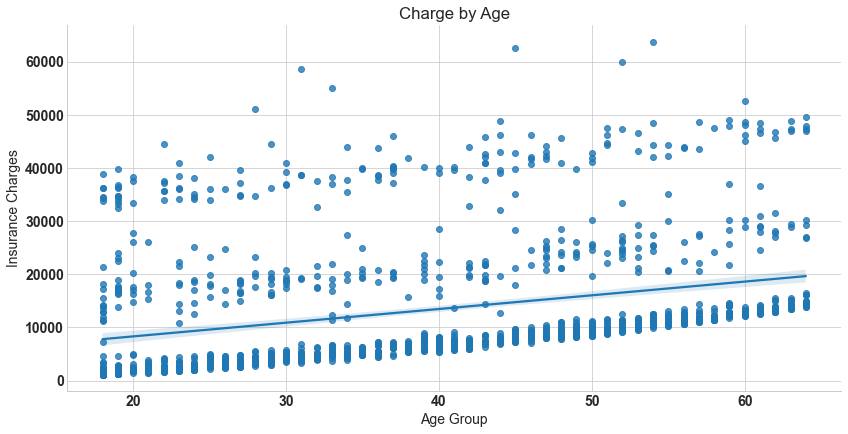

In [3]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

sns.lmplot(x='age',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Age Group')
plt.ylabel('Insurance Charges')
plt.title('Charge by Age')

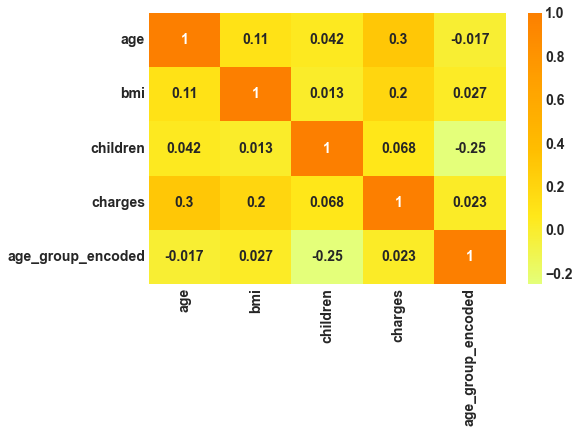

In [4]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [5]:
categorical_columns = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
               dtype='int8')
df_encode.head()

,age,bmi,charges,age_group,age_group_encoded,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,Under 25,4,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,Under 25,4,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,25-34,0,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,25-34,0,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,25-34,0,1,0,0,0,0,0,0,1,0,0


In [6]:
from sklearn.model_selection import train_test_split

X = df_encode.drop(['charges', 'age_group'], axis=1) # independent variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)
X_train

,age,bmi,age_group_encoded,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
923,34,35.815,0,1,0,0,0,0,0,0,1,0,0
1121,46,38.170,2,1,0,1,0,0,0,0,0,1,0
713,20,40.470,4,1,0,0,0,0,0,0,0,0,0
552,62,21.400,3,1,0,0,0,0,0,0,0,0,1
738,23,31.730,4,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,18,26.315,4,0,0,0,0,0,0,0,0,0,0
950,57,18.335,3,1,0,0,0,0,0,0,0,0,0
1064,29,25.600,0,0,0,0,0,1,0,0,0,0,1
742,53,34.105,2,1,0,0,0,0,0,1,0,0,0


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from evaluations import mse
print(mse(y_test, predictions))

285490387.5672355


InvalidIndexError: (slice(None, None, None), None)

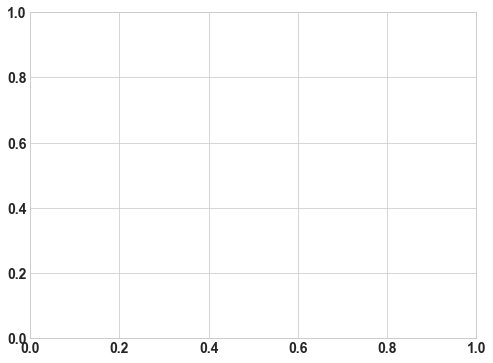

In [ ]:
y_pred_line = model.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()